In [2]:
import requests
from bs4 import BeautifulSoup
import urllib.request
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
r = requests.get('https://m.rbi.org.in/Scripts/PublicationsView.aspx?id=19991')


In [4]:
soup = BeautifulSoup(r.content, 'html.parser')
data = []
table = soup.find('table', attrs={'class':'lineItemsTable'})


rows = soup.find_all('tr')
for row in rows:
    cols = row.find_all('td')
    cols = [ele.text.strip() for ele in cols]
    data.append([ele for ele in cols if ele])

In [5]:
data[40]

['West Bengal', '20018', '26385', '33345', '40134', '49370', '57749', '62183']

In [6]:
dic_ruralpop={}
itr=6
lenn=len(data)
print(lenn)
#for i in range(5)
while itr<41:
    dic_ruralpop[data[itr][0].upper()]=float(data[itr][7])
    itr+=1
dic_ruralpop["NCT OF DELHI"]=dic_ruralpop["DELHI"]
dic_ruralpop["JAMMU & KASHMIR"]=dic_ruralpop["JAMMU AND KASHMIR"]
dic_ruralpop["DADRA & NAGAR HAVELI"]=dic_ruralpop["DADRA AND NAGAR HAVELI"]
dic_ruralpop["DAMAN & DIU"]=dic_ruralpop["DAMAN AND DIU"]
dic_ruralpop["ANDAMAN & NICOBAR ISLANDS"]=dic_ruralpop["ANDAMAN AND NICOBAR ISLANDS"]

43


In [7]:
dic_ruralpop

{'ANDAMAN AND NICOBAR ISLANDS': 237.0,
 'ANDHRA PRADESH': 56362.0,
 'ARUNACHAL PRADESH': 1066.0,
 'ASSAM': 26807.0,
 'BIHAR': 92341.0,
 'CHANDIGARH': 29.0,
 'CHHATTISGARH': 19608.0,
 'DADRA AND NAGAR HAVELI': 183.0,
 'DAMAN AND DIU': 60.0,
 'DELHI': 419.0,
 'GOA': 552.0,
 'GUJARAT': 34695.0,
 'HARYANA': 16509.0,
 'HIMACHAL PRADESH': 6176.0,
 'JAMMU AND KASHMIR': 9108.0,
 'JHARKHAND': 25055.0,
 'KARNATAKA': 37469.0,
 'KERALA': 17471.0,
 'LAKSHADWEEP': 14.0,
 'MADHYA PRADESH': 52557.0,
 'MAHARASHTRA': 61556.0,
 'MANIPUR': 1736.0,
 'MEGHALAYA': 2371.0,
 'MIZORAM': 525.0,
 'NAGALAND': 1408.0,
 'ODISHA': 34971.0,
 'PUDUCHERRY': 395.0,
 'PUNJAB': 17344.0,
 'RAJASTHAN': 51500.0,
 'SIKKIM': 457.0,
 'TAMIL NADU': 37230.0,
 'TRIPURA': 2712.0,
 'UTTAR PRADESH': 155317.0,
 'UTTARAKHAND': 7037.0,
 'WEST BENGAL': 62183.0,
 'NCT OF DELHI': 419.0,
 'JAMMU & KASHMIR': 9108.0,
 'DADRA & NAGAR HAVELI': 183.0,
 'DAMAN & DIU': 60.0,
 'ANDAMAN & NICOBAR ISLANDS': 237.0}

In [8]:
r = requests.get('https://m.rbi.org.in/Scripts/PublicationsView.aspx?id=19992')
soup = BeautifulSoup(r.content, 'html.parser')
data = []
table = soup.find('table', attrs={'class':'lineItemsTable'})


rows = soup.find_all('tr')
for row in rows:
    cols = row.find_all('td')
    cols = [ele.text.strip() for ele in cols]
    data.append([ele for ele in cols if ele])


In [9]:
data[40]

['West Bengal', '6282', '8541', '10967', '14447', '18708', '22427', '29093']

In [10]:
dic_urbanpop={}
itr=6
lenn=len(data)
print(lenn)
#for i in range(5)
while itr<41:
    dic_urbanpop[data[itr][0].upper()]=float(data[itr][7])
    itr+=1
dic_urbanpop["NCT OF DELHI"]=dic_urbanpop["DELHI"]
dic_urbanpop["JAMMU & KASHMIR"]=dic_urbanpop["JAMMU AND KASHMIR"]
dic_urbanpop["DADRA & NAGAR HAVELI"]=dic_urbanpop["DADRA AND NAGAR HAVELI"]
dic_urbanpop["DAMAN & DIU"]=dic_urbanpop["DAMAN AND DIU"]
dic_urbanpop["ANDAMAN & NICOBAR ISLANDS"]=dic_urbanpop["ANDAMAN AND NICOBAR ISLANDS"]

43


In [11]:
dic_urbanpop

{'ANDAMAN AND NICOBAR ISLANDS': 143.0,
 'ANDHRA PRADESH': 28219.0,
 'ARUNACHAL PRADESH': 317.0,
 'ASSAM': 4399.0,
 'BIHAR': 11758.0,
 'CHANDIGARH': 1026.0,
 'CHHATTISGARH': 5937.0,
 'DADRA AND NAGAR HAVELI': 161.0,
 'DAMAN AND DIU': 183.0,
 'DELHI': 16369.0,
 'GOA': 907.0,
 'GUJARAT': 25745.0,
 'HARYANA': 8842.0,
 'HIMACHAL PRADESH': 689.0,
 'JAMMU AND KASHMIR': 3433.0,
 'JHARKHAND': 7933.0,
 'KARNATAKA': 23626.0,
 'KERALA': 15935.0,
 'LAKSHADWEEP': 50.0,
 'MADHYA PRADESH': 20069.0,
 'MAHARASHTRA': 50818.0,
 'MANIPUR': 834.0,
 'MEGHALAYA': 595.0,
 'MIZORAM': 572.0,
 'NAGALAND': 571.0,
 'ODISHA': 7004.0,
 'PUDUCHERRY': 853.0,
 'PUNJAB': 10399.0,
 'RAJASTHAN': 17048.0,
 'SIKKIM': 154.0,
 'TAMIL NADU': 34917.0,
 'TRIPURA': 961.0,
 'UTTAR PRADESH': 44495.0,
 'UTTARAKHAND': 3049.0,
 'WEST BENGAL': 29093.0,
 'NCT OF DELHI': 16369.0,
 'JAMMU & KASHMIR': 3433.0,
 'DADRA & NAGAR HAVELI': 161.0,
 'DAMAN & DIU': 183.0,
 'ANDAMAN & NICOBAR ISLANDS': 143.0}

In [12]:
r = requests.get('https://m.rbi.org.in/Scripts/PublicationsView.aspx?id=20001')
soup = BeautifulSoup(r.content, 'html.parser')
data = []
table = soup.find('table', attrs={'class':'lineItemsTable'})


rows = soup.find_all('tr')
for row in rows:
    cols = row.find_all('td')
    cols = [ele.text.strip() for ele in cols]
    data.append([ele for ele in cols if ele])
data[85]

['Andhra Pradesh', '4', '8', '7', '12', '12', '36', '45']

In [13]:

dic_ruralemp={}
itr=85
lenn=len(data)
print(lenn)
#for i in range(5)
while itr<120:
    try:
        dic_ruralemp[data[itr][0].upper()]=float(data[itr][5])/10
    except ValueError:
        dic_ruralemp[data[itr][0].upper()]=1.7
    itr+=1
dic_ruralemp["NCT OF DELHI"]=dic_ruralemp["DELHI"]
dic_ruralemp["ANDAMAN & NICOBAR ISLANDS"]=dic_ruralemp["ANDAMAN AND NICOBAR ISLANDS"]

122


In [14]:
r = requests.get('https://m.rbi.org.in/Scripts/PublicationsView.aspx?id=20002')
soup = BeautifulSoup(r.content, 'html.parser')
data = []
table = soup.find('table', attrs={'class':'lineItemsTable'})


rows = soup.find_all('tr')
for row in rows:
    cols = row.find_all('td')
    cols = [ele.text.strip() for ele in cols]
    data.append([ele for ele in cols if ele])
data

[['(16 kb) or  (163 kb)'],
 ['Date : Oct 13, 2020'],
 ['Table 13: State-wise Unemployment Rate: Usual Status (Adjusted) (Urban)'],
 ['(Urban Male)   \xa0(Per 1000)   State/Union Territory 1993-94 1999-00 2004-05 2009-10 2011-12 2017-18 2018-19   Andhra Pradesh 28 40 36 25 39 54 62   Arunachal Pradesh 17 14 11 34 36 82 74   Assam 55 77 69 40 54 53 99   Bihar 68 73 67 63 45 92 104   Chhattisgarh . . 38 31 41 59 46   Delhi 9 32 46 26 33 96 109   Goa 80 147 76 35 29 60 69   Gujarat 30 20 23 15 6 43 34   Haryana 25 27 32 22 40 65 86   Himachal Pradesh 33 62 17 31 19 74 65   Jammu & Kashmir 59 45 37 47 41 61 56   Jharkhand . . 75 53 46 104 87   Karnataka 29 30 19 24 24 63 50   Kerala 66 56 62 29 27 66 52   Madhya Pradesh 53 41 31 27 24 79 77   Maharashtra 43 56 35 28 18 62 52   Manipur 48 69 52 50 56 111 98   Meghalaya 10 34 35 30 24 56 46   Mizoram 5 34 16 25 40 127 74   Nagaland 69 93 46 61 191 165 154   Odisha 67 70 90 40 39 73 101   Punjab 31 28 29 44 26 65 61   Rajasthan 17 26 28 17 32 

In [15]:

dic_urbanemp={}
itr=85
lenn=len(data)
#for i in range(5)
while itr<120:
    try:
        dic_urbanemp[data[itr][0].upper()]=float(data[itr][5])/10
    except ValueError:
        dic_urbanemp[data[itr][0].upper()]=1.7
   # print(dic_urbanemp[data[itr][0].upper()])
    itr+=1
dic_urbanemp["NCT OF DELHI"]=dic_urbanemp["DELHI"]
dic_urbanemp["ANDAMAN & NICOBAR ISLANDS"]=dic_urbanemp["ANDAMAN AND NICOBAR ISLANDS"]

In [42]:
print(dic_urbanemp)

{'ANDHRA PRADESH': 4.3, 'ARUNACHAL PRADESH': 4.8, 'ASSAM': 5.6, 'BIHAR': 5.6, 'CHHATTISGARH': 4.3, 'DELHI': 3.5, 'GOA': 4.6, 'GUJARAT': 0.8, 'HARYANA': 4.2, 'HIMACHAL PRADESH': 4.0, 'JAMMU & KASHMIR': 7.0, 'JHARKHAND': 5.1, 'KARNATAKA': 2.9, 'KERALA': 6.1, 'MADHYA PRADESH': 2.6, 'MAHARASHTRA': 2.3, 'MANIPUR': 7.1, 'MEGHALAYA': 2.8, 'MIZORAM': 5.0, 'NAGALAND': 23.8, 'ODISHA': 3.5, 'PUNJAB': 2.8, 'RAJASTHAN': 3.1, 'SIKKIM': 2.3, 'TAMIL NADU': 2.7, 'TRIPURA': 25.2, 'UTTARAKHAND': 5.3, 'UTTAR PRADESH': 4.1, 'WEST BENGAL': 4.8, 'ANDAMAN AND NICOBAR ISLANDS': 8.6, 'CHANDIGARH': 6.4, 'DADRA & NAGAR HAVELI': 1.7, 'DAMAN & DIU': 0.5, 'LAKSHADWEEP': 11.5, 'PUDUCHERRY': 2.9, 'NCT OF DELHI': 3.5, 'ANDAMAN & NICOBAR ISLANDS': 8.6}


In [43]:
print(dic_urbanpop)

{'ANDAMAN AND NICOBAR ISLANDS': 143.0, 'ANDHRA PRADESH': 28219.0, 'ARUNACHAL PRADESH': 317.0, 'ASSAM': 4399.0, 'BIHAR': 11758.0, 'CHANDIGARH': 1026.0, 'CHHATTISGARH': 5937.0, 'DADRA AND NAGAR HAVELI': 161.0, 'DAMAN AND DIU': 183.0, 'DELHI': 16369.0, 'GOA': 907.0, 'GUJARAT': 25745.0, 'HARYANA': 8842.0, 'HIMACHAL PRADESH': 689.0, 'JAMMU AND KASHMIR': 3433.0, 'JHARKHAND': 7933.0, 'KARNATAKA': 23626.0, 'KERALA': 15935.0, 'LAKSHADWEEP': 50.0, 'MADHYA PRADESH': 20069.0, 'MAHARASHTRA': 50818.0, 'MANIPUR': 834.0, 'MEGHALAYA': 595.0, 'MIZORAM': 572.0, 'NAGALAND': 571.0, 'ODISHA': 7004.0, 'PUDUCHERRY': 853.0, 'PUNJAB': 10399.0, 'RAJASTHAN': 17048.0, 'SIKKIM': 154.0, 'TAMIL NADU': 34917.0, 'TRIPURA': 961.0, 'UTTAR PRADESH': 44495.0, 'UTTARAKHAND': 3049.0, 'WEST BENGAL': 29093.0, 'NCT OF DELHI': 16369.0, 'JAMMU & KASHMIR': 3433.0, 'DADRA & NAGAR HAVELI': 161.0, 'DAMAN & DIU': 183.0, 'ANDAMAN & NICOBAR ISLANDS': 143.0}


In [44]:
print(dic_ruralemp)

{'ANDHRA PRADESH': 1.2, 'ARUNACHAL PRADESH': 1.7, 'ASSAM': 4.5, 'BIHAR': 3.2, 'CHHATTISGARH': 0.8, 'DELHI': 7.8, 'GOA': 5.1, 'GUJARAT': 0.3, 'HARYANA': 2.4, 'HIMACHAL PRADESH': 1.0, 'JAMMU & KASHMIR': 2.5, 'JHARKHAND': 2.1, 'KARNATAKA': 0.9, 'KERALA': 6.8, 'MADHYA PRADESH': 0.4, 'MAHARASHTRA': 0.7, 'MANIPUR': 2.6, 'MEGHALAYA': 0.4, 'MIZORAM': 1.8, 'NAGALAND': 15.1, 'ODISHA': 2.2, 'PUNJAB': 1.9, 'RAJASTHAN': 0.7, 'SIKKIM': 1.0, 'TAMIL NADU': 2.0, 'TRIPURA': 10.5, 'UTTARAKHAND': 2.5, 'UTTAR PRADESH': 0.9, 'WEST BENGAL': 2.7, 'ANDAMAN AND NICOBAR ISLANDS': 5.4, 'CHANDIGARH': 1.7, 'DADRA & NAGAR HAVELI': 1.7, 'DAMAN & DIU': 1.7, 'LAKSHADWEEP': 16.0, 'PUDUCHERRY': 0.8, 'NCT OF DELHI': 7.8, 'ANDAMAN & NICOBAR ISLANDS': 5.4}


In [45]:
print(dic_ruralpop)

{'ANDAMAN AND NICOBAR ISLANDS': 237.0, 'ANDHRA PRADESH': 56362.0, 'ARUNACHAL PRADESH': 1066.0, 'ASSAM': 26807.0, 'BIHAR': 92341.0, 'CHANDIGARH': 29.0, 'CHHATTISGARH': 19608.0, 'DADRA AND NAGAR HAVELI': 183.0, 'DAMAN AND DIU': 60.0, 'DELHI': 419.0, 'GOA': 552.0, 'GUJARAT': 34695.0, 'HARYANA': 16509.0, 'HIMACHAL PRADESH': 6176.0, 'JAMMU AND KASHMIR': 9108.0, 'JHARKHAND': 25055.0, 'KARNATAKA': 37469.0, 'KERALA': 17471.0, 'LAKSHADWEEP': 14.0, 'MADHYA PRADESH': 52557.0, 'MAHARASHTRA': 61556.0, 'MANIPUR': 1736.0, 'MEGHALAYA': 2371.0, 'MIZORAM': 525.0, 'NAGALAND': 1408.0, 'ODISHA': 34971.0, 'PUDUCHERRY': 395.0, 'PUNJAB': 17344.0, 'RAJASTHAN': 51500.0, 'SIKKIM': 457.0, 'TAMIL NADU': 37230.0, 'TRIPURA': 2712.0, 'UTTAR PRADESH': 155317.0, 'UTTARAKHAND': 7037.0, 'WEST BENGAL': 62183.0, 'NCT OF DELHI': 419.0, 'JAMMU & KASHMIR': 9108.0, 'DADRA & NAGAR HAVELI': 183.0, 'DAMAN & DIU': 60.0, 'ANDAMAN & NICOBAR ISLANDS': 237.0}


In [19]:
final_dic={}
for key in dic_urbanemp.keys():
    var_mid=(dic_ruralemp[key]*dic_ruralpop[key]+dic_urbanemp[key]*dic_urbanpop[key])/(dic_ruralpop[key]+dic_urbanpop[key])
    final_dic[key] = float("{0:.2f}".format(var_mid))

In [46]:
# #del(final_dic)
# del(dic_ruralemp)
# del(dic_urbanemp)

In [47]:
final_dic

{'ANDHRA PRADESH': 2.23,
 'ARUNACHAL PRADESH': 2.41,
 'ASSAM': 4.66,
 'BIHAR': 3.47,
 'CHHATTISGARH': 1.61,
 'DELHI': 3.61,
 'GOA': 4.79,
 'GUJARAT': 0.51,
 'HARYANA': 3.03,
 'HIMACHAL PRADESH': 1.3,
 'JAMMU & KASHMIR': 3.73,
 'JHARKHAND': 2.82,
 'KARNATAKA': 1.67,
 'KERALA': 6.47,
 'MADHYA PRADESH': 1.01,
 'MAHARASHTRA': 1.42,
 'MANIPUR': 4.06,
 'MEGHALAYA': 0.88,
 'MIZORAM': 3.47,
 'NAGALAND': 17.61,
 'ODISHA': 2.42,
 'PUNJAB': 2.24,
 'RAJASTHAN': 1.3,
 'SIKKIM': 1.33,
 'TAMIL NADU': 2.34,
 'TRIPURA': 14.35,
 'UTTARAKHAND': 3.35,
 'UTTAR PRADESH': 1.61,
 'WEST BENGAL': 3.37,
 'ANDAMAN AND NICOBAR ISLANDS': 6.6,
 'CHANDIGARH': 6.27,
 'DADRA & NAGAR HAVELI': 1.7,
 'DAMAN & DIU': 0.8,
 'LAKSHADWEEP': 12.48,
 'PUDUCHERRY': 2.24,
 'NCT OF DELHI': 3.61,
 'ANDAMAN & NICOBAR ISLANDS': 6.6}

In [48]:
G=nx.read_gml("2011.gml")
G.remove_edges_from(nx.selfloop_edges(G))
bins=[]
temp=-25.5
while temp<26:
    bins.append(temp)
    temp+=1
dic1=dic_ruralemp
dic2=dic_urbanemp
y=0
count=0
x=[]
for u,v,a in G.edges(data=True):
    x+=[round((dic2[v]-dic1[u]),1)]*(a["weight"])
    count=count+a["weight"]
    y=round((dic2[v]-dic1[u]),1)*a["weight"]+y          #y is the weighted sum of unemployment differences
print(x[0:40])

[-11.2, -11.0, -13.1, -13.1, -8.9, -8.9, -8.9, -9.6, -9.6, -9.6, -9.6, -9.6, 9.2, 9.2, 9.2, 9.2, 9.2, 9.2, 9.2, 9.2, -15.2, -15.2, -15.2, -15.2, -15.2, -15.2, -15.2, -15.2, -12.5, -12.5, -12.5, -12.5, -12.5, -12.5, -12.5, -12.5, -12.5, -12.5, -12.5, -12.5]


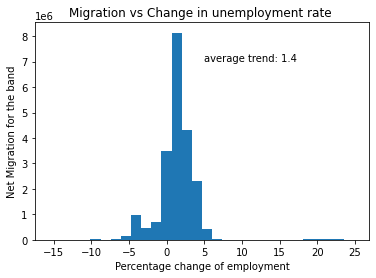

In [57]:
m=plt.hist(x, bins=30, histtype='bar', )
strr="average trend: "+str(round((y/count),2))
plt.text(5, 7.0*1e6, strr)
fig=plt.gcf()
plt.title("Migration vs Change in unemployment rate ")
plt.ylabel("Net Migration for the band")
plt.xlabel("Percentage change of employment")
fig.savefig("unempRU")
plt.show()

In [50]:
y/count

1.403549898884